**Downloading and Loading the Dataset**

In [ ]:
from google.colab import files
uploaded=files.upload()

In [67]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [68]:
df=pd.read_csv('Churn_Modelling.csv')

In [69]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [70]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


**3.A.Univariate Analysis**

0    7963
1    2037
Name: Exited, dtype: int64

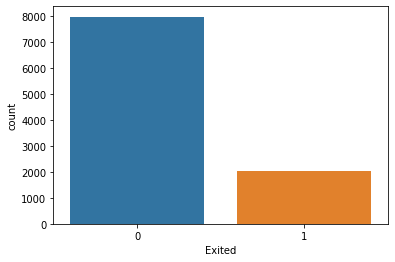

In [71]:
sns.countplot(x=df['Exited'])
df['Exited'].value_counts()

<AxesSubplot:ylabel='Gender'>

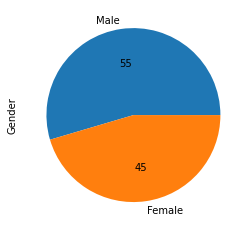

In [72]:
df['Gender'].value_counts().plot(kind='pie',autopct='%.0f')

**3.B.Bi-Variate Analysis**

<AxesSubplot:xlabel='Gender', ylabel='Age'>

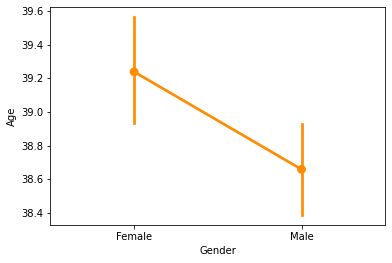

In [73]:
sns.pointplot(x='Gender',y='Age',data=df,color='darkorange')

<AxesSubplot:xlabel='CreditScore', ylabel='Balance'>

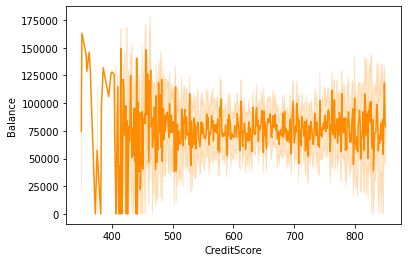

In [74]:
sns.lineplot(x=df['CreditScore'],y=df['Balance'],color='darkorange')

**3.C.Multi-Variate Analysis**

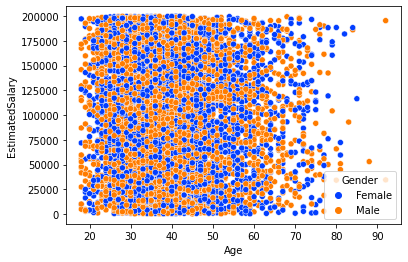

In [75]:
sns.scatterplot(
    x='Age',
    y='EstimatedSalary', 
    data=df,
    palette='bright',
    hue='Gender');

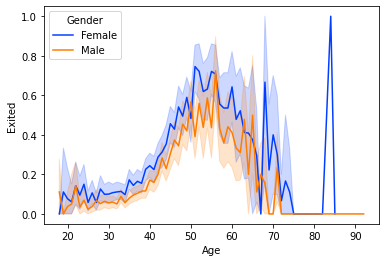

In [76]:
sns.lineplot(
    x="Age", 
    y="Exited",
    data=df,
    palette='bright',
    hue='Gender');

In [ ]:
df.describe()

In [ ]:
df.isnull().sum()

**4.PERFORM DESCRIPTIVE STATISTICS ON THE DATASET**

In [ ]:
df.sum()

In [ ]:
df.mean(numeric_only=True)

In [ ]:
df.median(numeric_only=True)

In [ ]:
df.mode(numeric_only=True)

In [ ]:
df.count()

In [ ]:
df.std(numeric_only=True)

In [ ]:
df.min()

In [ ]:
df.max()

**5.HANDLE THE MISSING VALUES**

In [ ]:
df.notnull()

In [ ]:
df.fillna(0)

In [ ]:
df.fillna(method='pad')

In [ ]:
df.fillna(method='bfill')

**6.FIND THE OUTLIERS AND REPLACE THE OUTLIERS**

In [ ]:
qnt=df.quantile(q=(0.25,0.75))
iqr=qnt.loc[0.75]-qnt.loc[0.25]

In [ ]:
iqr

In [ ]:
lower=qnt.loc[0.25]-1.5*iqr
lower

In [ ]:
upper=qnt.loc[0.75]+1.5*iqr
upper

In [ ]:
sns.boxplot(x=df['Age'])

In [ ]:
df["Age"]=np.where(df['Age']>35,40,df['Age'])

In [ ]:
sns.boxplot(x=df['Age'])

**7.CHECK FOR CATEGORIAL COLUMNS AND PERFORM ENCODING**

In [ ]:
df.dtypes

In [ ]:
df["Gender"].replace({"Female":0,"Male":1},inplace=True)

In [ ]:
df.head(6)

**8.SPLIT THE DATA INTO DEPENDENT AND INDEPENDENT VARIABLES**

In [ ]:
x=df.iloc[:,:-1].values
y=df.iloc[:,3].values

In [ ]:
x

In [ ]:
y

**9.SCALE THE INDEPENDENT VARIABLES**

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
credit_score=df[["CreditScore","EstimatedSalary"]]

In [ ]:
scaler=StandardScaler()
scaler.fit(credit_score)

**10.SPLIT THE DATA INTO TRAINING AND TESTING**

In [ ]:
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split
g,k=make_blobs(n_samples=1000)

In [ ]:
g_train,g_test,k_train,k_test=train_test_split(g,k,test_size=0.33)
print(g_train.shape,g_test.shape,k_train.shape,k_test.shape)